## Problem Statement
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement :

What is the likelihood of an active employee leaving the company?

What are the key indicators of an employee leaving the company?

What policies or strategies can be adopted based on the results to improve employee retention?

## Importing Python liabraries

In [8]:
import pandas as pd #data processing
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


Let us load in the dataset via the trusty Pandas package into a dataframe object and have a quick look at the first few rows

In [9]:
data=pd.read_csv("Hr_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Explanatory Data Analysis

In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

.Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
  
  .Univariate analysis
      
      .Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      
      .Categorical variable : Bar chart showing frequency in each category
   
   .Bivariate analysis
       
       .Continous & Continous : Scatter plots to know how continous variables interact with each other
       
       .Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        categorical variables
       
       .Categorical & Continous : Boxplots or even bar charts

.Detect outliers

.Feature engineering

In [9]:
# Dataset columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Dataset header
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


As observed from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [13]:
# let's break down the columns by their type (i.e. int64, float64, object)
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
        'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
        'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('float64'): Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18'],
       dtype='object')}

In [14]:
# Columns datatypes and missing valuesNumerical features overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

### Numerical features overview

In [15]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Plotting univariate Distribution A univariate distribution is a probability distribution of only one random variable.

Histogram:
   
   A Histogram visualises the distribution of data over a continuous interval or certain time period. Each bar in a histogram represents the tabulated frequency at each interval/bin. The total area of the Histogram is equal to the number of data.
Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution. Height of the bar represents the frequency per individual interval or bin.

Lets plot Histogram for various factors in the same plot space using the axes.

KDEPLOT:
    
   Rather than a histogram, we can get a smooth estimate of the distribution using a kenel density estimation,which seaborn does with sns.kdeplot.

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


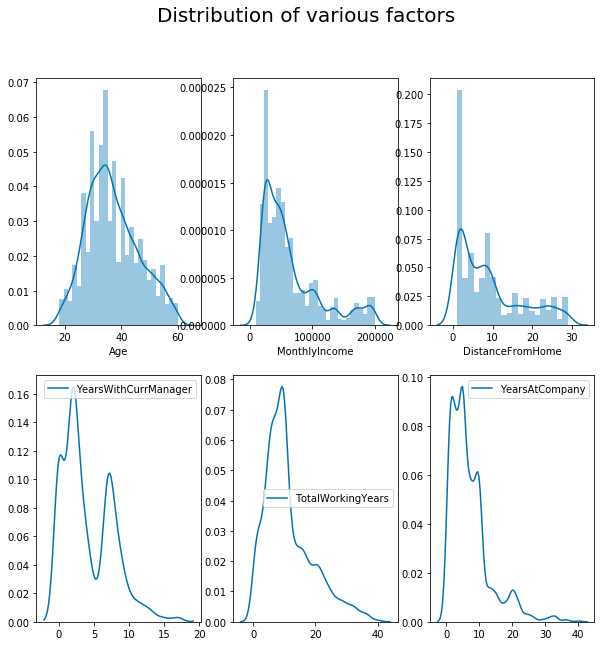

In [23]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(data['Age'], ax = ax[0,0]) 
sns.distplot(data['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(data['DistanceFromHome'], ax = ax[0,2]) 
sns.kdeplot(data['YearsWithCurrManager'], ax = ax[1,0]) 
sns.kdeplot(data['TotalWorkingYears'], ax = ax[1,1]) 
sns.kdeplot(data['YearsAtCompany'], ax = ax[1,2])  
plt.show()

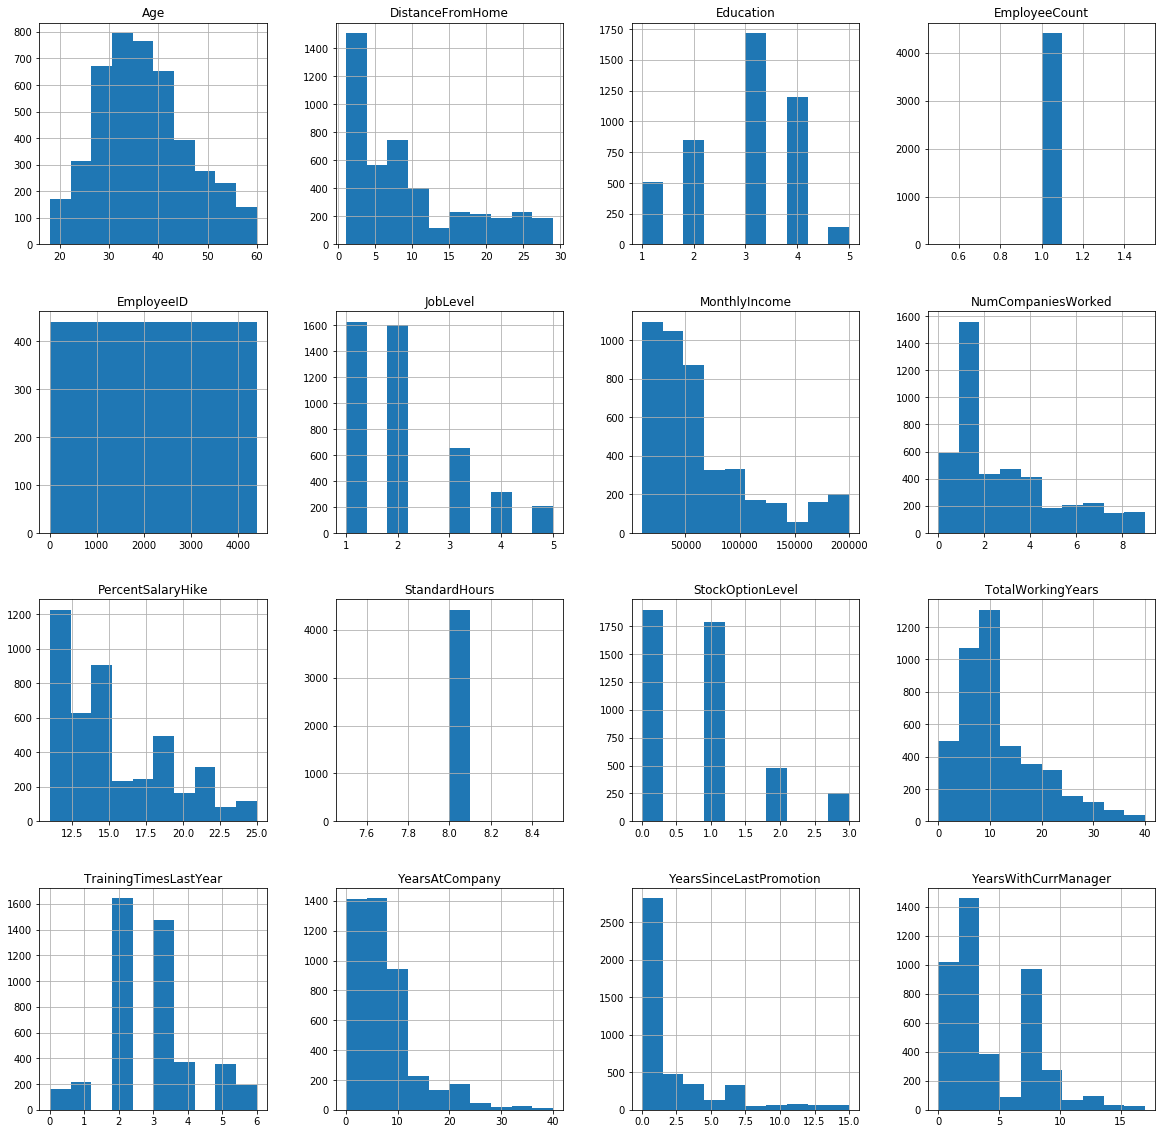

In [16]:
#Univariate Analysis
data.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

*Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

*Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

*EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

*EmployeeID Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Countplot:
    Count Plot A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

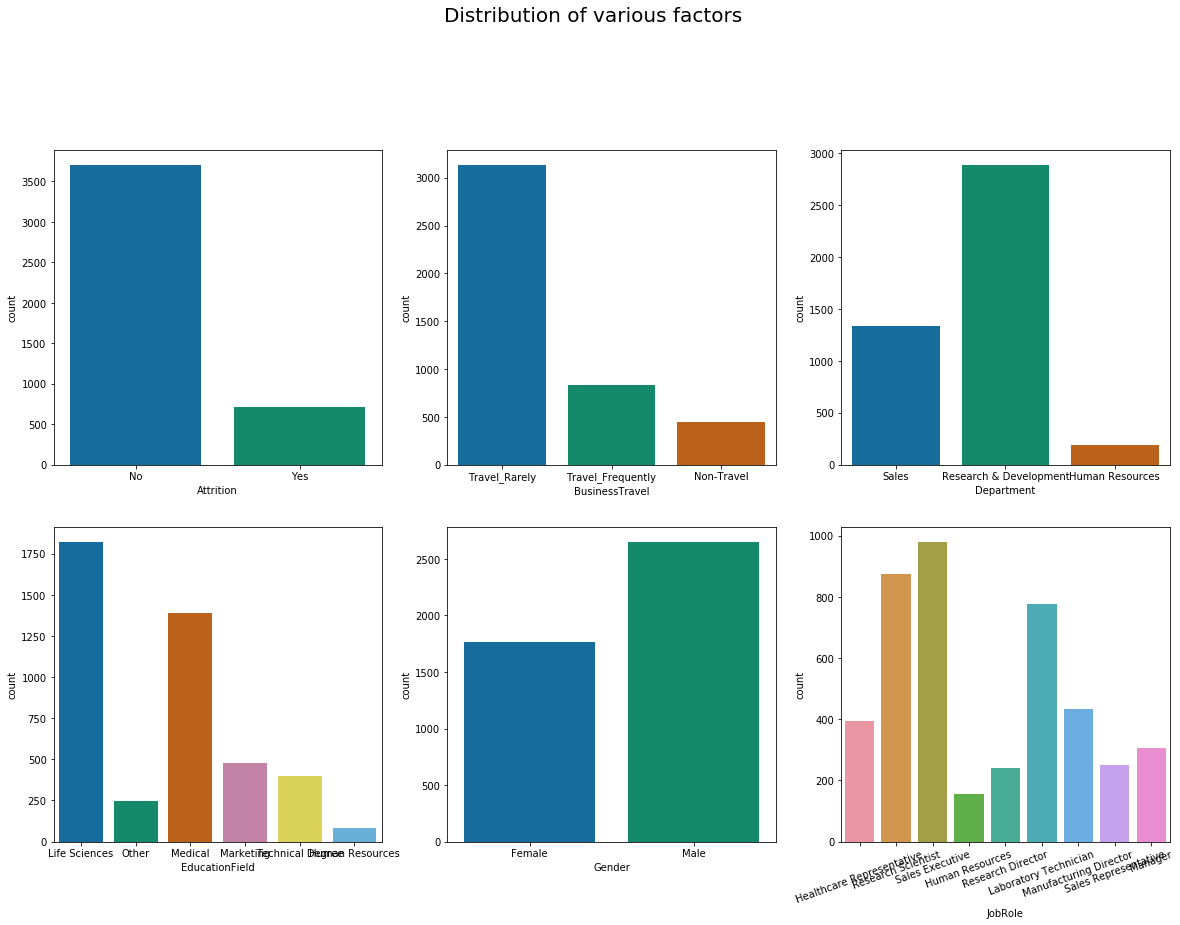

In [26]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(data['Attrition'], ax = ax[0,0]) 
sns.countplot(data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(data['Department'], ax = ax[0,2]) 
sns.countplot(data['EducationField'], ax = ax[1,0])
sns.countplot(data['Gender'], ax = ax[1,1])  
sns.countplot(data['JobRole'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

### Inferences:
Candidates who has done their bachelor degree in Life Science are employeed more
There are more male employees
Majority of the employees show greater Attrition
Majority of the employees are married
Majority of the employees seem to travel rarely
Majority of the employees are from research & development department

### Age

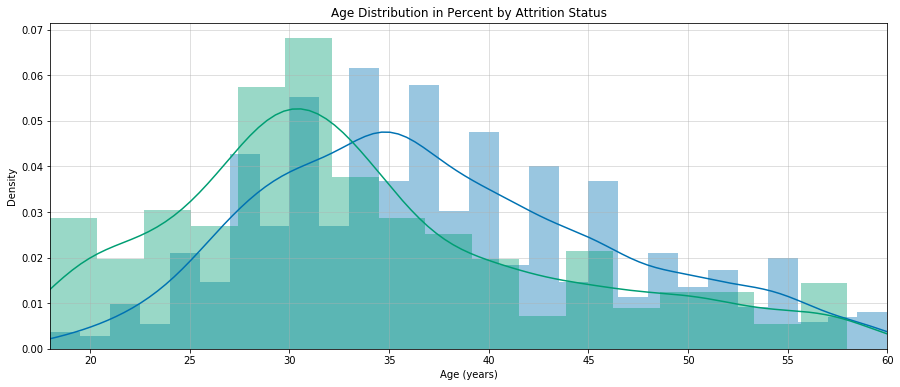

In [17]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.distplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.distplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


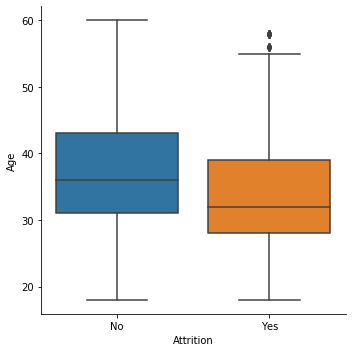

In [8]:
sns.factorplot(data=data,y='Age',x='Attrition',kind='box')

Note that median as well as maximum age of the people with 'No'  attrition is higher than that of the 'yes' categoy.This shows that people with higher age have lesser tendancy to leave the organization which make sense as they may have setteled in the organization.

### JobRole

In [16]:
pd.crosstab(columns=[data.Attrition],index=[data.JobRole],normalize=True)

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.076190,0.012925
Human Resources,0.030612,0.004762
Laboratory Technician,0.147619,0.028571
Manager,0.059864,0.009524
Manufacturing Director,0.087755,0.010884
Research Director,0.041497,0.012925
Research Scientist,0.162585,0.036054
Sales Executive,0.184354,0.037415
Sales Representative,0.048299,0.008163


### Education

In [18]:
# Education Field of employees
data['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

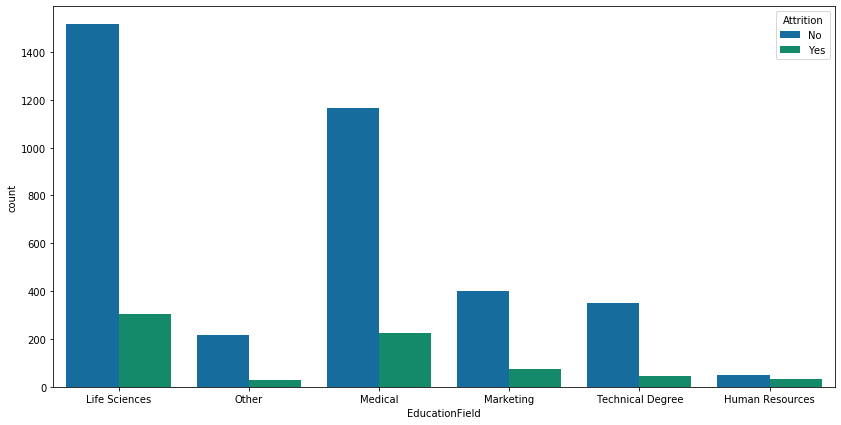

In [19]:
plt.figure(figsize=(14,7))Gender
sns.countplot(x='EducationField',data=data,hue='Attrition')

### Gender

In [20]:
# Gender of employees
data['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

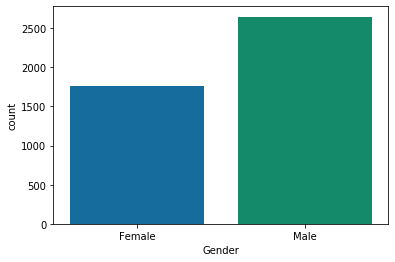

In [21]:
sns.countplot(data['Gender'])

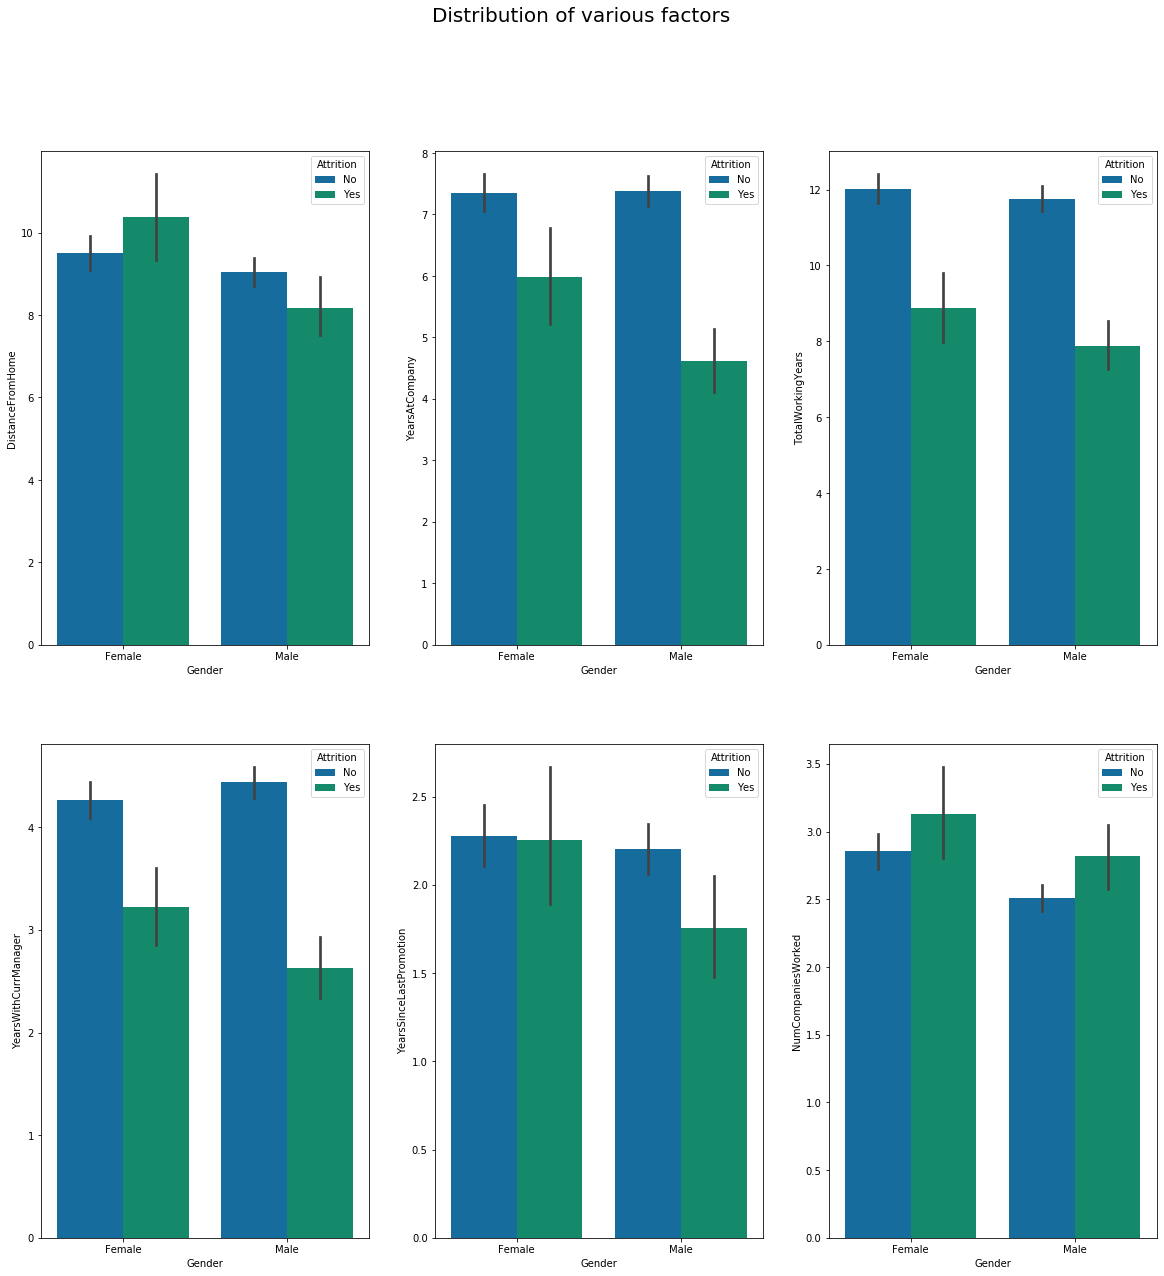

In [35]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.barplot(data['Gender'],data['DistanceFromHome'],hue = data['Attrition'], ax = ax[0,0]); 
sns.barplot(data['Gender'],data['YearsAtCompany'],hue = data['Attrition'], ax = ax[0,1]); 
sns.barplot(data['Gender'],data['TotalWorkingYears'],hue = data['Attrition'], ax = ax[0,2]); 
sns.barplot(data['Gender'],data['YearsWithCurrManager'],hue = data['Attrition'], ax = ax[1,0]); 
sns.barplot(data['Gender'],data['YearsSinceLastPromotion'],hue = data['Attrition'], ax = ax[1,1]); 
sns.barplot(data['Gender'],data['NumCompaniesWorked'],hue = data['Attrition'], ax = ax[1,2]); 
plt.show()

Conclusion from above fig

1.Distance from home matters to women employees more than men. Female employes are spending more years in one company compare to their counterpart.

2.Female employes spending more years in current company are more inclined to switch.

### Marital Status

In [40]:
# Marital Status of employees
data['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

The dataset features three marital status: Married (2019 employees), Single (1410 employees), Divorced (981 employees).

### Distance from home

In [45]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(data['DistanceFromHome'].min(),
                                                                                       data['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [49]:
print('Average distance from home for currently active employees: {:.2f} miles and es-employees {:.2f} miles'.format(data[data['Attrition']=='No']['DistanceFromHome'].mean(),data[data['Attrition']=='Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 9.23 miles and es-employees 9.01 miles


In [50]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    data[data['Attrition'] == 'No']['DistanceFromHome'].mean(), data[data['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 9.23 miles and ex-employees: 9.01 miles


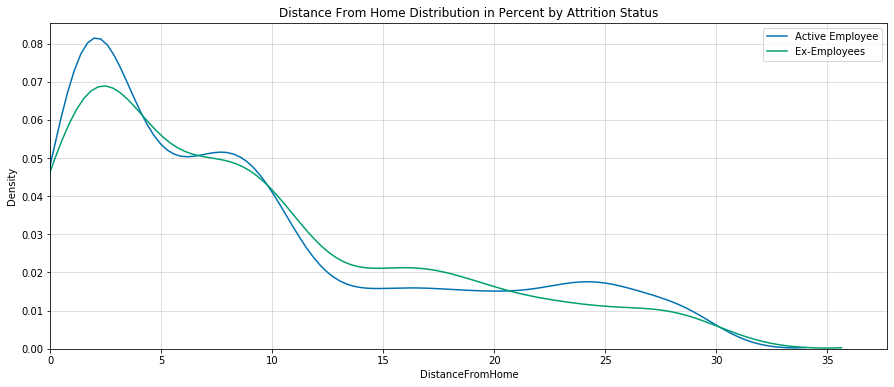

In [52]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

### Department

In [53]:
# The organisation consists of several departments
data['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

Note that both Attrition as well as the Ddepartment are categorical.In such cases a coss tabulation is the most reasonable way to analyze the trends; which shows clearly the number of observations fo each class which makes it easier to analyze the results.

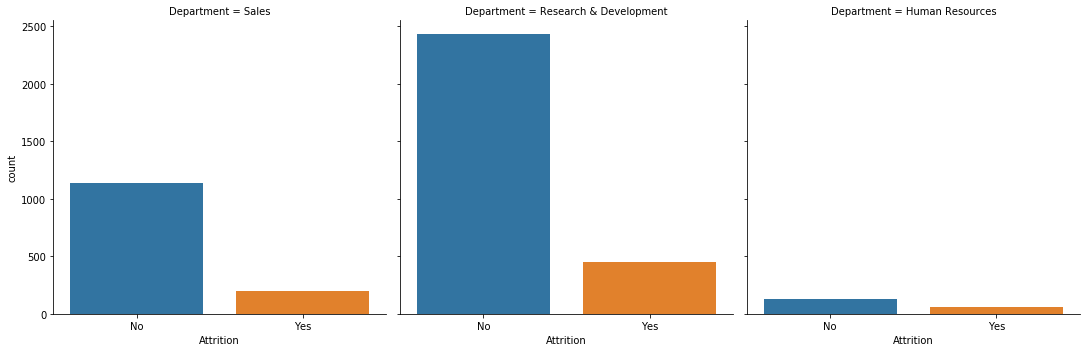

In [10]:
sns.factorplot(data=data,kind='count',x='Attrition',col='Department')

In [14]:
pd.crosstab(columns=[data['Attrition']],index=[data.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.698413,0.301587
Research & Development,0.842872,0.157128
Sales,0.849776,0.150224
All,0.838776,0.161224


Most of the observations coespond to 'No'.About 84% of people in Sales don't want to leave and 15% wants to leave.Similar conclusions can be drawn from other department. 

In [55]:
print("Number of training times last year varies from {} to {} years.".format(
    data['TrainingTimesLastYear'].min(), data['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


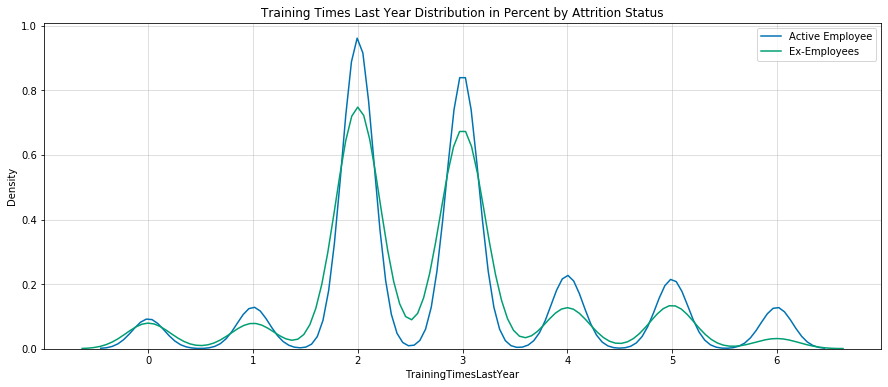

In [56]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

### No of companies worked

In [57]:
data['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

### years at the company

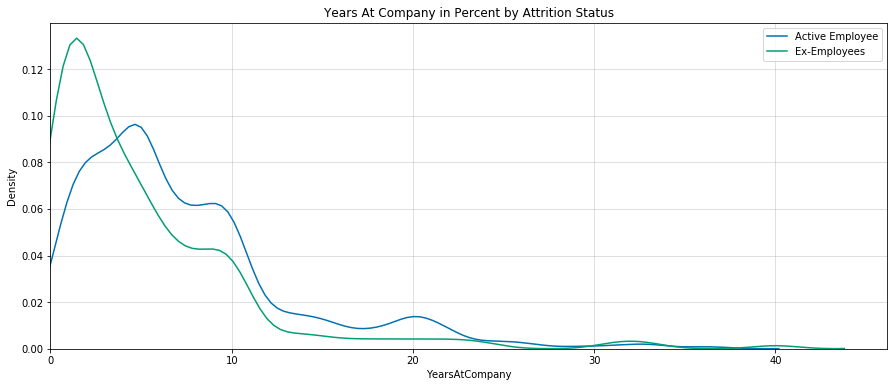

In [59]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [62]:
print("Number of Years with the current manager varies from {} to {} years.".format(
    data['YearsWithCurrManager'].min(), data['YearsWithCurrManager'].max()))

Number of Years with the current manager varies from 0 to 17 years.


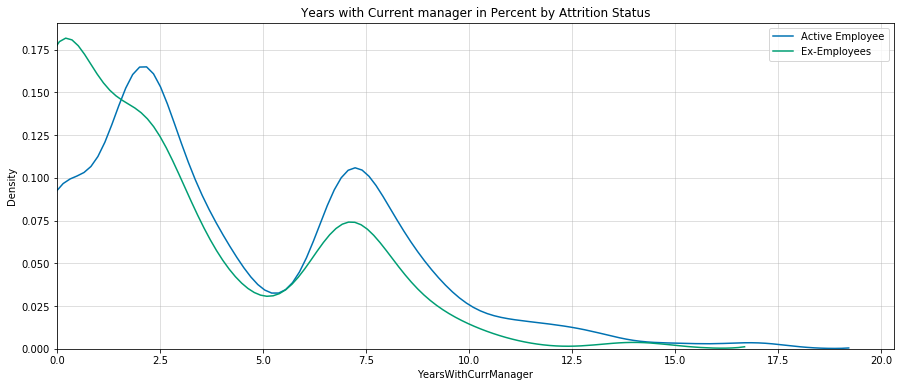

In [64]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years with Current manager in Percent by Attrition Status');

In [65]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    data['YearsSinceLastPromotion'].min(), data['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


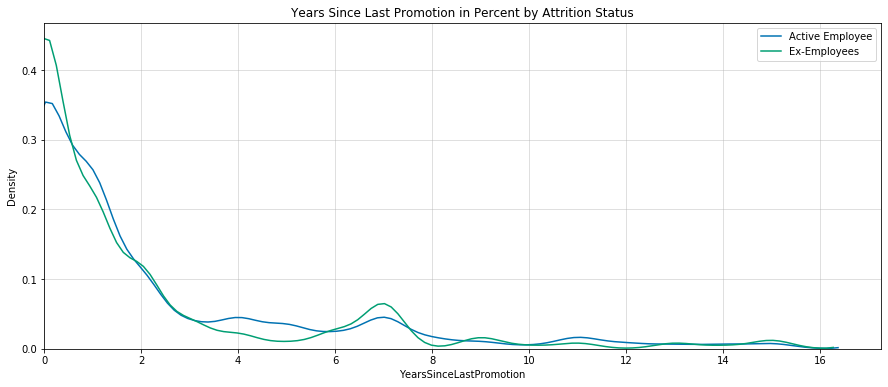

In [66]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [68]:
data['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

All employees have a standard 8-hour work commitment

In [70]:
print("Employee Monthly Income varies from {} to {}.".format(
    data['MonthlyIncome'].min(), data['MonthlyIncome'].max()))

Employee Monthly Income varies from 10090 to 199990.


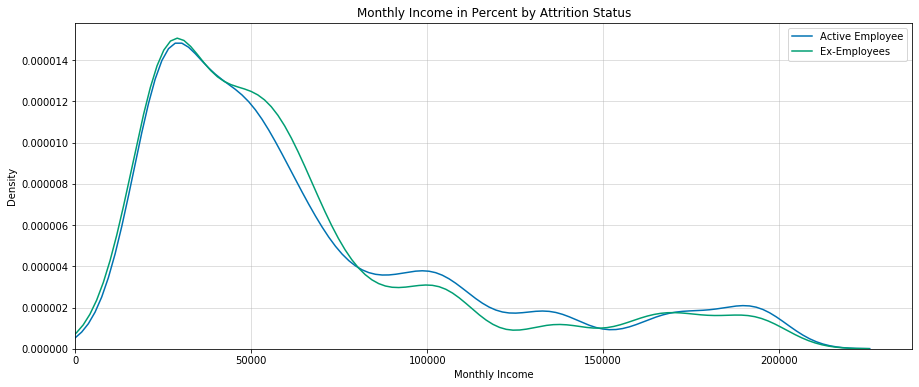

In [71]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [73]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    data['PercentSalaryHike'].min(), data['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


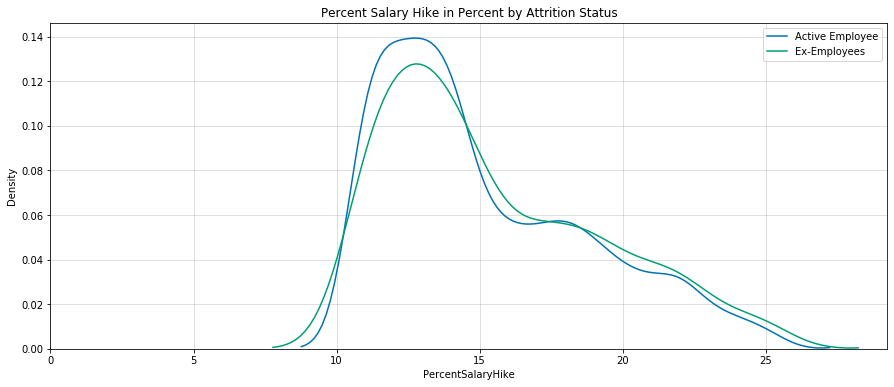

In [74]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

### Attrition

The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

In [78]:
 #Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
data['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [79]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


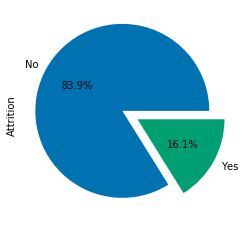

In [81]:
data.groupby('Attrition').Attrition.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1))

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

## Corelation

By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

In this correlation plot, I will use the the seaborn library to produce a interactive Pearson correlation matrix via the Heatmap function as follows:

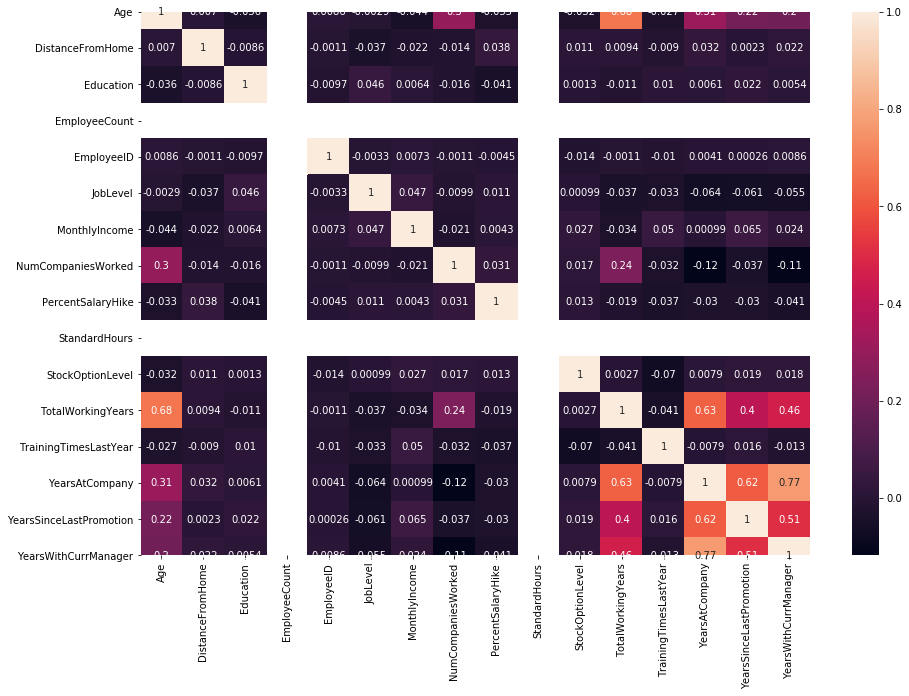

In [84]:
corelation=data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corelation,annot=True)

As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.


Takeaway from the plots
From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. 
In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.
Analysis of correlation results (sample analysis):
-Monthly income is highly correlated with Job level.
-Job level is highly correlated with total working hours.
-Monthly income is highly correlated with total working hours.
-Age is also positively correlated with the Total working hours.
-Marital status and stock option level are negatively correlated

### EDA Concluding Remarks

Let's summarise the findings from this EDA:

*The dataset contains some  missing  data values.

*The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
    
*The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.

*The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.

*Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

Other observations include:

*Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.

*About 10% of leavers left when they reach their 2-year anniversary at the company.

*Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.

*People who live further away from their work show higher proportion of leavers compared to their counterparts.

*People who travel frequently show higher proportion of leavers compared to their counterparts.

*People who have to work overtime show higher proportion of leavers compared to their counterparts.

*Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.

*Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

## Data preprocessing

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

### Encoding

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [4]:
print(data.shape)
data.head()

(4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = []
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count.append(col)
print('{} columns were label encoded.'.format(le_count))

['Attrition', 'Gender', 'Over18'] columns were label encoded.


In [12]:
# convert rest of categorical variable into dummy
data = pd.get_dummies(data, drop_first=True)

In [101]:
print(data.shape)
data.head()

(4410, 38)


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,0,1,131160,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,2,0,1,41890,0.0,...,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,3,1,4,193280,1.0,...,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,1,4,1,3,83210,3.0,...,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,5,1,1,23420,4.0,...,0,0,0,0,0,0,1,0,0,1


To look for any null values, we can just invoke the isnull call as follows

In [90]:
data.isnull().sum()

Age                                   0
Attrition                             0
DistanceFromHome                      0
Education                             0
EmployeeCount                         0
EmployeeID                            0
Gender                                0
JobLevel                              0
MonthlyIncome                         0
NumCompaniesWorked                   19
Over18                                0
PercentSalaryHike                     0
StandardHours                         0
StockOptionLevel                      0
TotalWorkingYears                     9
TrainingTimesLastYear                 0
YearsAtCompany                        0
YearsSinceLastPromotion               0
YearsWithCurrManager                  0
BusinessTravel_Travel_Frequently      0
BusinessTravel_Travel_Rarely          0
Department_Research & Development     0
Department_Sales                      0
EducationField_Life Sciences          0
EducationField_Marketing              0


In [13]:
data.fillna(0,axis=1,inplace=True)

In [14]:
data.drop(['EmployeeCount','EmployeeID','Over18'],axis=1,inplace=True)

In [112]:
data.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,0,1,131160,1.0,11,8,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,0,1,41890,0.0,23,8,...,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,4,193280,1.0,15,8,...,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,1,3,83210,3.0,11,8,...,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,1,23420,4.0,12,8,...,0,0,0,0,0,0,1,0,0,1


## Implementing Machine Learning Models

After performing some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

### Splitting Data into Train and Test sets
But before we even start training a model, we will have to partition our dataset into a training set and a test set using sklearn.

In [15]:
#Split data into training and Testing set:
#Choose dependent and independent var
#here dependent var is Attrition and rest of the var are indepdent var.
X=data.drop('Attrition',axis=1)
y=data['Attrition']

In [16]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=7,stratify=y)

In [115]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3307, 34)
Number transactions y_train dataset:  (3307,)
Number transactions X_test dataset:  (1103, 34)
Number transactions y_test dataset:  (1103,)


## Feature Scaling

Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [17]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [18]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
#import some comman libs:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

### Logistic Regression
is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [13]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("                    Classification Report \n",classification_report(y_pred,y_test))

0.8422484134179511
[[910  15]
 [159  19]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1069
           1       0.11      0.56      0.18        34

    accuracy                           0.84      1103
   macro avg       0.55      0.71      0.55      1103
weighted avg       0.96      0.84      0.89      1103



Accuracy is 83% but even though recall and Precision is low for class 1
Due to Class Imbalance problem model is not able to make predictions on class 1(Attrition Yes

In [19]:
pip install imbalanced-learn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\dell\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [5]:
#Performing OverSample using SMOTE(Synthetic Minority Over Sampling Technique)
#import imbalanced-learn as imblearn

import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()

Using TensorFlow backend.


In [24]:
x1,y1 = smote.fit_sample(X,y)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=10)

In [26]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("                    Classification Report \n",classification_report(y_pred,y_test))

0.6054054054054054
[[632 496]
 [380 712]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59      1012
           1       0.65      0.59      0.62      1208

    accuracy                           0.61      2220
   macro avg       0.61      0.61      0.60      2220
weighted avg       0.61      0.61      0.61      2220



## Oversampler

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

x1,y1 = ros.fit_resample(X,y)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [29]:
reg = LogisticRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

reg.score(x_test,y_test)

0.5972972972972973

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1115
           1       0.59      0.65      0.61      1105

    accuracy                           0.60      2220
   macro avg       0.60      0.60      0.60      2220
weighted avg       0.60      0.60      0.60      2220



## Using Undersampling

### ClusterCentroids

In [31]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
x1,y1 = cc.fit_resample(X,y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [33]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [34]:
reg.score(x_test,y_test)

0.5058548009367682

In [35]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[216,   0],
       [211,   0]], dtype=int64)

## Random Undersampler

In [36]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x1,y1 = rus.fit_resample(X,y)
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[123,  93],
       [ 67, 144]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       216
           1       0.61      0.68      0.64       211

    accuracy                           0.63       427
   macro avg       0.63      0.63      0.62       427
weighted avg       0.63      0.63      0.62       427



In [38]:
reg.score(x_test,y_test)

0.6252927400468384

In [128]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.73 (0.02)


### Fine-tuning

GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [58]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


best params: LogisticRegression(C=1.3709999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 1.3709999999999998}
best score: 0.7304744128807302


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       216
           1       0.79      0.74      0.76       211

    accuracy                           0.78       427
   macro avg       0.78      0.77      0.77       427
weighted avg       0.78      0.78      0.77       427



## Random Forest Classifier
Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

In [39]:
seed=0 # We set our random seed to zero for reproducibility
rf_model=RandomForestClassifier(n_jobs= -1,
    n_estimators=1000,
#     'warm_start'= True, 
    max_features= 0.3,
    max_depth= 4,
    min_samples_leaf= 2,
    #max_features = 'sqrt',
    random_state = seed,
    verbose= 0)

In [41]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2,
                       n_estimators=1000, n_jobs=-1, random_state=0)

Having fitted our forest of trees with our parameters to the training set against our target variable, we now have a learning model rf which we can make predictions out of. To use our Random Forest in predicting against our test data, we can use sklearn's .predict method as follows

In [42]:
y_pred=rf_model.predict(x_test)

In [43]:
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))
print()

Accuracy_score: 0.7049180327868853
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.80      0.73       216
           1       0.75      0.61      0.67       211

    accuracy                           0.70       427
   macro avg       0.71      0.70      0.70       427
weighted avg       0.71      0.70      0.70       427



# Gradient Boosting Classifier


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

In [60]:
y_pred=gbc_clf.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))
print("auc:","\n",roc_auc_score(y_test, y_pred))
print("f1_score:","\n", f1_score(y_test, y_pred))

Accuracy_score: 0.775175644028103
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       216
           1       0.79      0.74      0.76       211

    accuracy                           0.78       427
   macro avg       0.78      0.77      0.77       427
weighted avg       0.78      0.78      0.77       427

auc: 
 0.7747608390380901
f1_score: 
 0.7647058823529411


# XGBoost

In [46]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)
y_ped=xgb_clf.predict(x_test)

In [48]:
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))

Accuracy_score: 0.775175644028103
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       216
           1       0.79      0.74      0.76       211

    accuracy                           0.78       427
   macro avg       0.78      0.77      0.77       427
weighted avg       0.78      0.78      0.77       427



In [56]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.7747608390380901

In [57]:
 from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

0.7647058823529411

# Conclusions:
    

## .DistanceFromHome: 
    Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.

## .TotalWorkingYears: 
    The more experienced employees are less likely to leave. 
    Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.

## .YearsAtCompany: 
    Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

## .Age: 
    Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

## .Monthly Income: 
    people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.